# Plot Histograms of Raster Values

## Open raster data in python

You can use the rasterio and numpy packages. Remember you can use the rasterio context manager to import the raster object into Python.

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import rasterio as rio
import earthpy as et
import earthpy.plot as ep

# Get data and set wd
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, "earth-analytics"))

# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [2]:
# Define relative path to file
lidar_dem_path = os.path.join("data", "colorado-flood", "spatial",
                             "boulder-leehill-rd", "pre-flood", "lidar",
                             "pre_DTM.tif")

# Open data and assign negative value to nan
with rio.open(lidar_dem_path) as src:
    lidar_dem_im = src.read(1, masked=True)
    
# View object dimensions
lidar_dem_im.shape

(2000, 4000)

## Raster histograms - Distribution of elevation values

The histogram below represents the distributiuon of pixel elevation values in your data. This plot is useful to:
1. Identify outlier data values
2. Assess the min and max values in your data
3. Explore the general distribution of elevation values in the data - i.e. is the area generally flat, hilly, is it high elevation or low elevation.

To begin, you will look at the shape of your lidar array object

In [3]:
# The .ravel method turns an 2D numpy array into a 1D vector
print(lidar_dem_im.shape)
print(lidar_dem_im.ravel().shape)

(2000, 4000)
(8000000,)


If your array has nan values in it, it's best to remove the nan values before trying to plot a histogram:
1. flatten the data so it can be coerced into a histogram using .ravel()
2. remove nan values lidar_dem_hist[~np.isnan(lidar_dem_hist)]

However, since you need masked=True while opening the raster, the nan values have already been removed by the masking operation.

Once you have cleaned up the data you can plot a histogram.

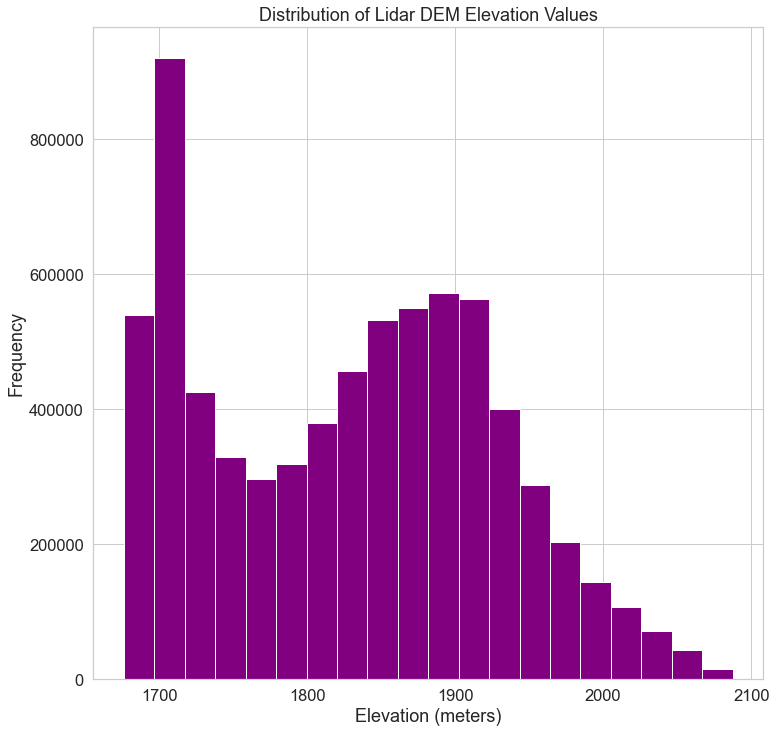

In [4]:
ep.hist(lidar_dem_im, colors=["purple"],
       title="Distribution of Lidar DEM Elevation Values",
       xlabel="Elevation (meters)",
       ylabel="Frequency")

plt.show()

## What does a histogram tell you?

A histogram shows us how the data aredistributed. Each bin or bar in the plot represents the number or frequency of pixels that fall within the range specified by the bin.

You can use the bins= argument to specify fewer or more breaks in your histogram.

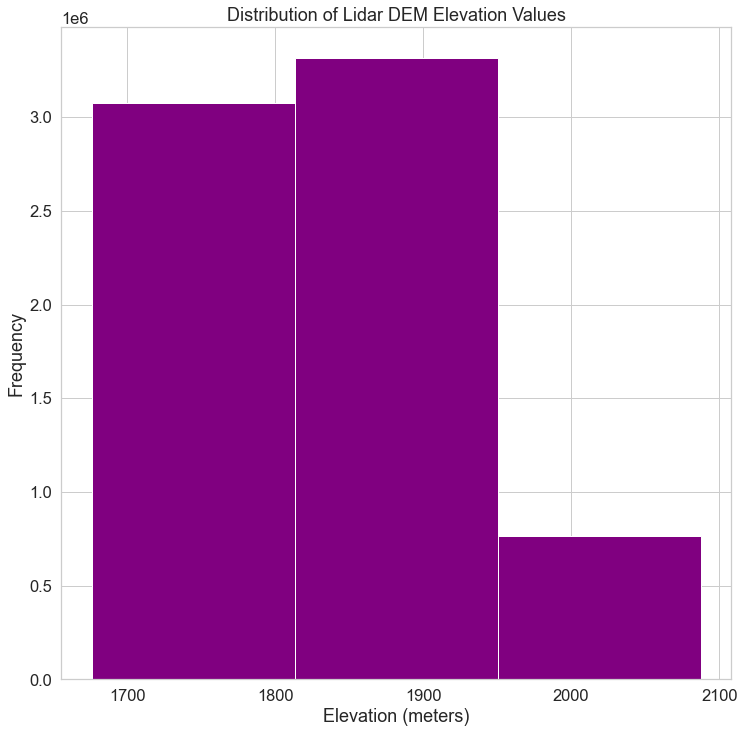

In [5]:
ep.hist(lidar_dem_im, colors=["purple"],
       title="Distribution of Lidar DEM Elevation Values",
       xlabel="Elevation (meters)",
       ylabel="Frequency",
       bins=3)

plt.show()

Alternatively, you can specify specific break points that you want Python to use when it bins the data.

bins=[1600, 1800, 2000, 2100]

In this case, Python will count the number of pixels that occur within each value range as follows:
- bin 1: number of pixels with values between 1600-1800
- bin 2: number of pixels with values between 1800-2000
- bin 3: number of pixels with values between 2000-2100

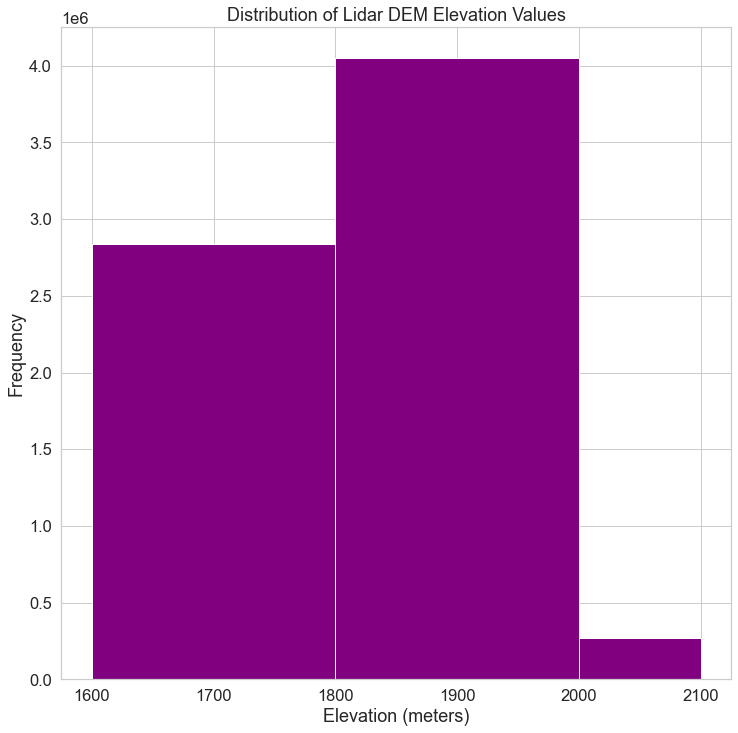

In [6]:
ep.hist(lidar_dem_im,
       bins=[1600, 1800, 2000, 2100],
       colors=["purple"],
       title="Distribution of Lidar DEM Elevation Values",
       xlabel="Elevation (meters)",
       ylabel="Frequency")

plt.show()